<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Projeto_Processamento_de_Sinais_G4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo: Eryka Mathias Lopes, Gabriel Freitas, Gabriele Santos Pereira e Victor Brasil.


In [ ]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.signal as ss
from scipy.signal import find_peaks
pi = np.pi

A frequência de amostragem é: 44100Hz


Text(0.5, 0, 'Tempo [s]')

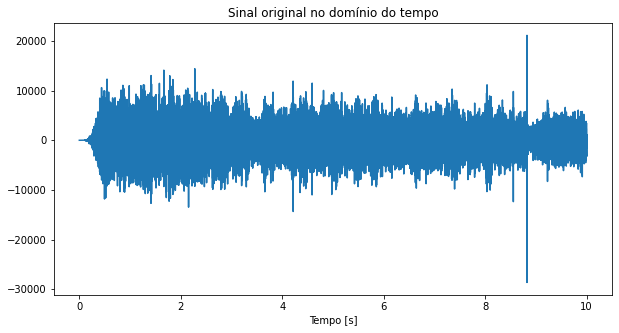

In [ ]:
#Lendo o arquivo
fs_data,data = wavfile.read('/content/dados_04.wav')
T = 1/fs_data
t_data = np.linspace(0,10,data.shape[0])
print('A frequência de amostragem é: {}Hz'.format(fs_data))

#Plotando o Sinal Original
plt.figure(figsize=(10,5))
plt.plot(t_data,data)
plt.title('Sinal original no domínio do tempo')
plt.xlabel('Tempo [s]')

Text(0.5, 0, 'Frequência (Hz)')

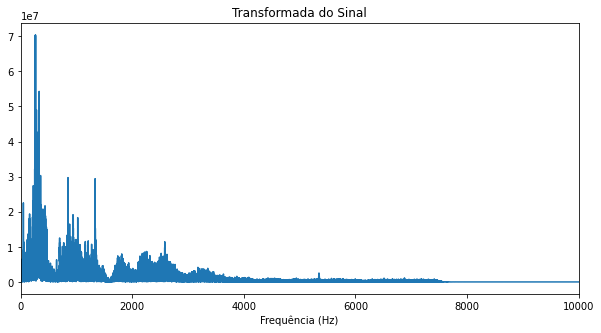

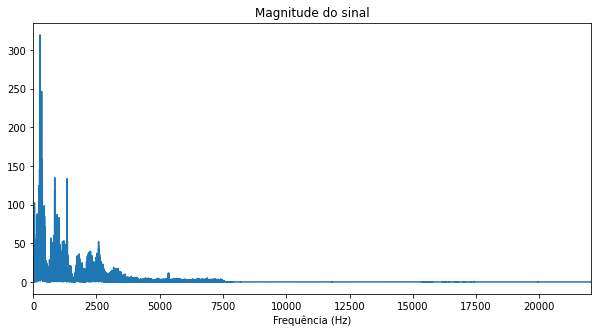

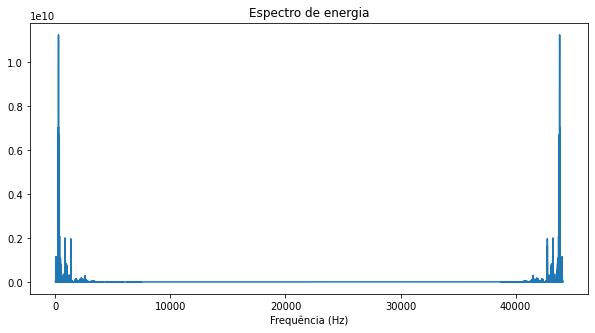

In [ ]:
#Esboçando a Transformada
data_fft = np.fft.fft(data)
data_fft = abs(data_fft)
freq_data = np.arange(0,fs_data,fs_data/data_fft.shape[0])

plt.figure(figsize=(10,5))
plt.plot(freq_data,data_fft)
plt.xlim(0,10000)
plt.title('Transformada do Sinal')
plt.xlabel('Frequência (Hz)')

#Esboçando a magnitude
mag_data = np.absolute(data_fft)
mag_norm = 2*mag_data/len(mag_data)

plt.figure(figsize=(10,5))
plt.plot(freq_data,mag_norm)
plt.title('Magnitude do sinal')
plt.xlabel('Frequência (Hz)')
plt.xlim([0,fs_data/2])

#Esboçando o Espectro
energia = mag_data**2/len(mag_data)

plt.figure(figsize=(10,5))
plt.plot(freq_data,energia)
plt.title('Espectro de energia')
plt.xlabel('Frequência (Hz)')



a ordem do filtro necessaria é 9


Text(0.5, 0, 'Tempo (s)')

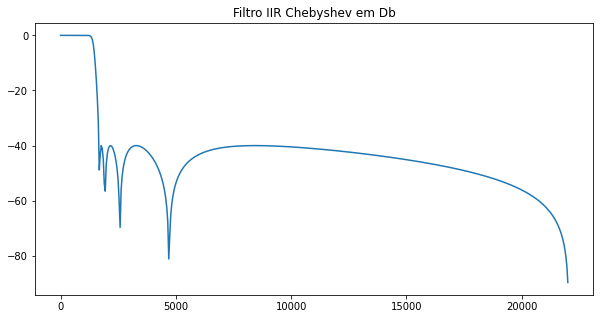

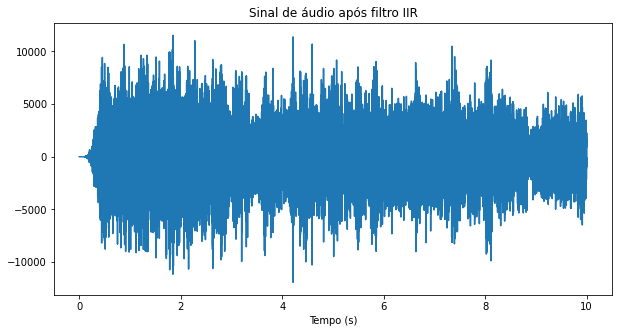

In [ ]:
#Passando um filtro IIR para remover frequências maiores que 1500 Hz
Wp = 1500  #frequência mínima na banda de transição
Ws = 1700  #frequência máxima na banda de passagem
Rp =10     #atenuação máxima na banda de passagem
Rs =40     #atenuação mínima na banda de rejeição

ord,Wn = ss.cheb2ord(Wp,Ws,Rp,Rs,fs=fs_data)
print('a ordem do filtro necessaria é ' + str(ord))

b,a = ss.cheby2(ord,Rs,Wn,'low',fs=fs_data)
freq,abss = ss.freqz(b,a,fs=fs_data)

Db = 20*np.log10(abs(abss))
plt.figure(figsize=(10,5))
plt.plot(freq,Db)
plt.title('Filtro IIR Chebyshev em Db')

filtered = ss.lfilter(b,a,data)
plt.figure(figsize=(10,5))
plt.plot(t_data,filtered)
plt.title('Sinal de áudio após filtro IIR')
plt.xlabel('Tempo (s)')

Text(0.5, 0, 'Tempo (s)')

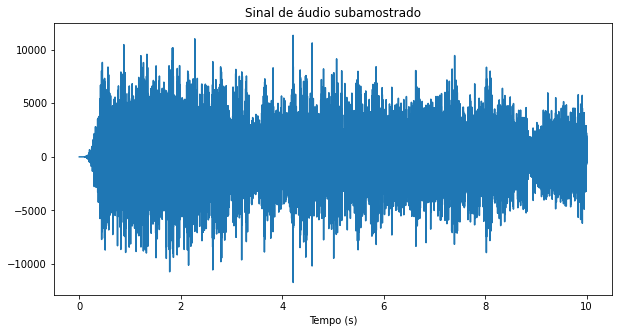

In [ ]:
#Realizando o Downsampling, sabendo que a frequência mínima de amostragem deve ser 3kHz
k = int(fs_data/3000)
fsD = fs_data/k
tD = t_data[::k]
dataD = filtered[::k]

plt.figure(figsize=(10,5))
plt.plot(tD,dataD)
plt.title('Sinal de áudio subamostrado')
plt.xlabel('Tempo (s)')


Text(0.5, 0, 'Tempo (s)')

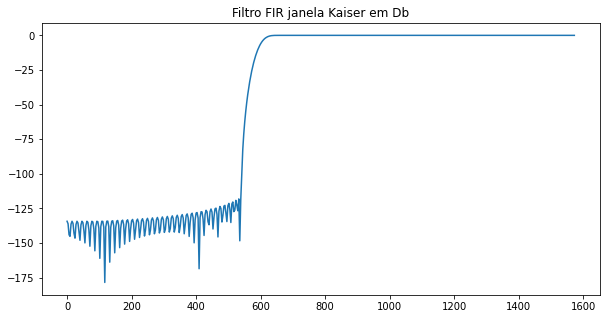

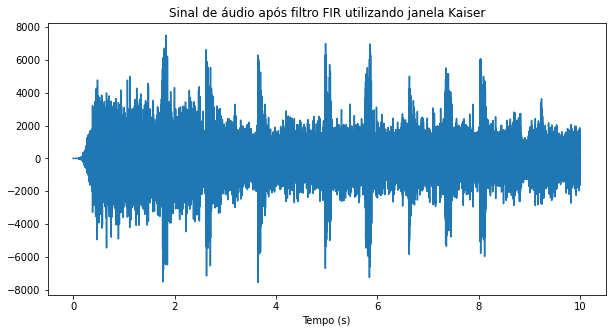

In [ ]:
#Passando um filtro FIR para remover frequências menores que 500 Hz, usando janela Kaiser e beta 12
order = 201

h = ss.firwin(order,600,window=('kaiser',12),fs=fsD,pass_zero='highpass')

freq,abss = ss.freqz(h,fs=fsD)
Db = 20*np.log10(abs(abss))

plt.figure(figsize=(10,5))
plt.plot(freq,Db)
plt.title('Filtro FIR janela Kaiser em Db')

filtered = np.convolve(h,dataD,mode='same')
plt.figure(figsize=(10,5))
plt.plot(tD,filtered)
plt.title('Sinal de áudio após filtro FIR utilizando janela Kaiser')
plt.xlabel('Tempo (s)')

Text(0.5, 0, 'Tempo(s)')

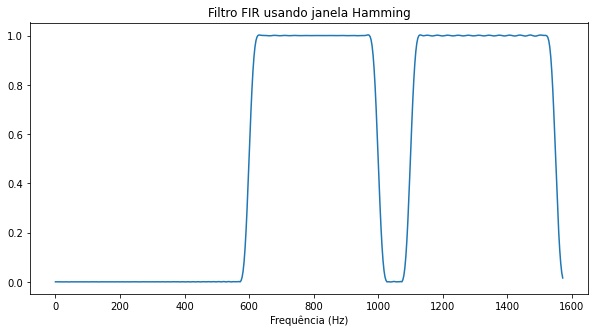

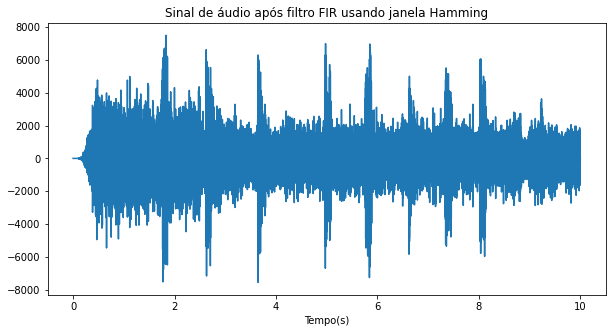

In [ ]:
#Passando filtro FIR para eliminar frequências entre 1000 e 1100, usando janela Hamming
win = 'hamming'

k = ss.firwin(order,[600,1000,1100,1550],window=win,fs=fsD,pass_zero = 'bandpass')
freq,abss = ss.freqz(k,fs=fsD)
plt.figure(figsize=(10,5))
plt.plot(freq,abs(abss))
plt.title('Filtro FIR usando janela Hamming')
plt.xlabel('Frequência (Hz)')

filtered = np.convolve(h,dataD,mode='same')
plt.figure(figsize=(10,5))
plt.plot(tD,filtered)
plt.title('Sinal de áudio após filtro FIR usando janela Hamming')
plt.xlabel('Tempo(s)')

Text(0.5, 0, 'Frequência (Hz)')

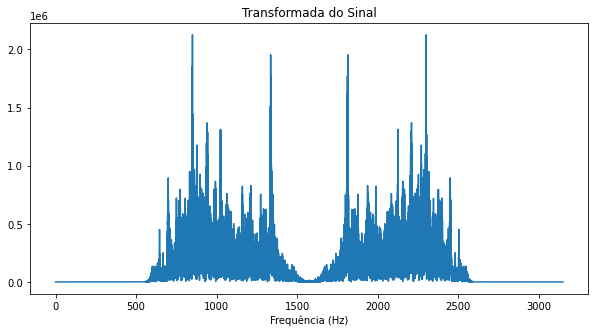

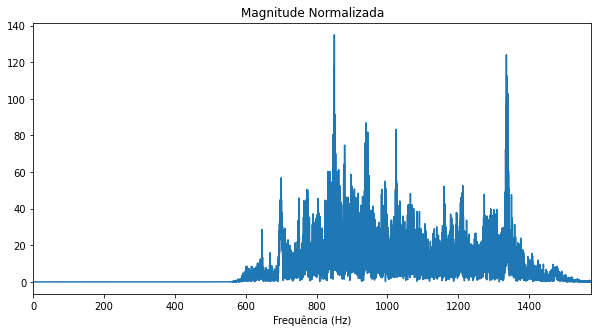

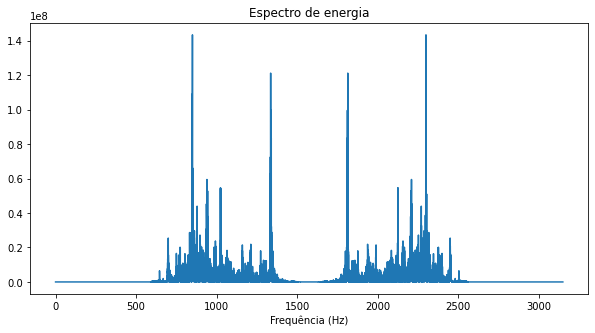

In [ ]:
#Esboçando a Transformada do Sinal Filtrado
filtered_fft = np.fft.fft(filtered)
filtered_fft = abs(filtered_fft)
freq = np.arange(0,fsD,fsD/filtered_fft.shape[0])

plt.figure(figsize=(10,5))
plt.plot(freq,filtered_fft)
plt.title('Transformada do Sinal')
plt.xlabel('Frequência (Hz)')

#Esboçando a Magnitude do Sinal Filtrado
mag_filtered = np.absolute(filtered_fft)
mag_norm_filtered = 2*mag_filtered/len(mag_filtered)

plt.figure(figsize=(10,5))
plt.plot(freq,mag_norm_filtered)
plt.title('Magnitude Normalizada')
plt.xlabel('Frequência (Hz)')
plt.xlim([0,fsD/2])

#Esboçando o Espectro do Sinal Filtrado
energia_filtered = mag_filtered**2/len(mag_filtered)

plt.figure(figsize=(10,5))
plt.plot(freq,energia_filtered)
plt.title('Espectro de energia')
plt.xlabel('Frequência (Hz)')

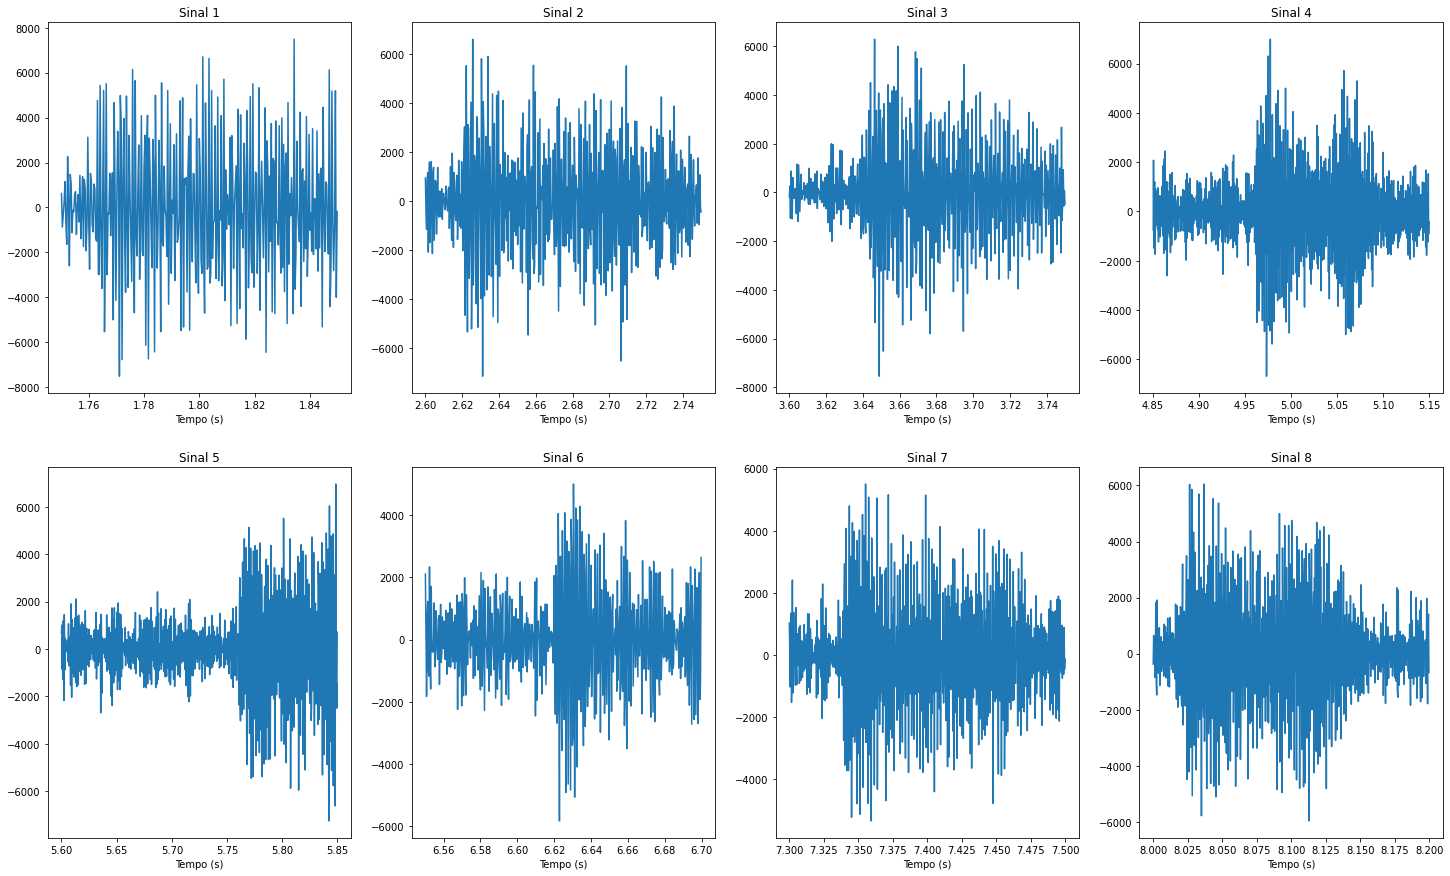

In [ ]:
#Código completo dos dígitos
# vetores boleanos para recorte do sinal
s1 = (tD>1.75) & (tD<1.85)
s2 = (tD>2.6) & (tD<2.75)
s3 = (tD>3.6) & (tD<3.75)
s4 = (tD>4.85) & (tD<5.15)
s5 = (tD>5.6) & (tD<5.85)
s6 = (tD>6.55) & (tD<6.7)
s7 = (tD>7.3) & (tD<7.5)
s8 = (tD>8) & (tD<8.2)

plt.figure(figsize=(25,15))
plt.title('Sinal FIltrado')
plt.xlabel('Tempo (s)')
plt.plot(tD,filtered)

plt.subplot(241)
plt.title('Sinal 1')
plt.xlabel('Tempo (s)')
plt.plot(tD[s1],filtered[s1])

plt.subplot(242)
plt.title('Sinal 2')
plt.xlabel('Tempo (s)')
plt.plot(tD[s2],filtered[s2])

plt.subplot(243)
plt.title('Sinal 3')
plt.xlabel('Tempo (s)')
plt.plot(tD[s3],filtered[s3])

plt.subplot(244)
plt.title('Sinal 4')
plt.xlabel('Tempo (s)')
plt.plot(tD[s4],filtered[s4])

plt.subplot(245)
plt.title('Sinal 5')
plt.xlabel('Tempo (s)')
plt.plot(tD[s5],filtered[s5])

plt.subplot(246)
plt.title('Sinal 6')
plt.xlabel('Tempo (s)')
plt.plot(tD[s6],filtered[s6])

plt.subplot(247)
plt.title('Sinal 7')
plt.xlabel('Tempo (s)')
plt.plot(tD[s7],filtered[s7])

plt.subplot(248)
plt.title('Sinal 8')
plt.xlabel('Tempo (s)')
plt.plot(tD[s8],filtered[s8])

tabela DTMF
1 - 697Hz 1209Hz 
2 - 697Hz 1336Hz 
3 - 697Hz 1477Hz 
4 - 770Hz 1209Hz 
5 - 770Hz 1336Hz 
6 - 770Hz 1477Hz 
7 - 852Hz 1209Hz 
8 - 852Hz 1336Hz 
9 - 852Hz 1477Hz 
0 - 941Hz 1336Hz 


as frequencias encontradas são: []


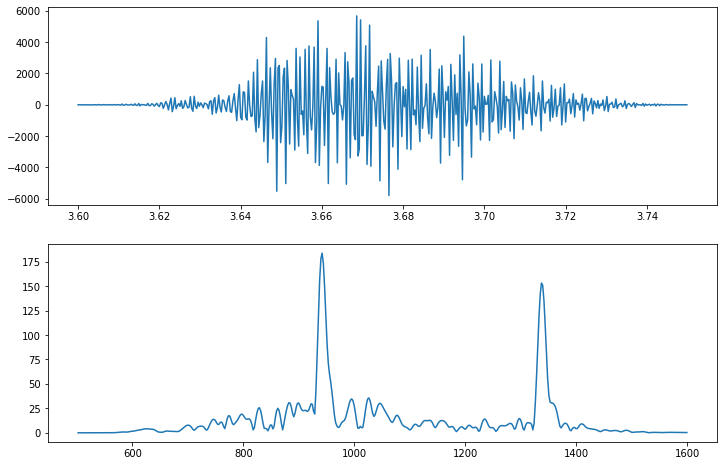

In [ ]:
#FFT dos sinais
y = filtered[s3]
tsel = tD[s3]

#Aplicando uma janela hanning
win = np.hanning(y.shape[0])
y = y*win

#Suavizando a FFT
yfft = np.fft.fft(y,3*y.shape[0])
yfft = np.abs(yfft)/yfft.shape[0]

freq = np.linspace(0,fsD,yfft.shape[0])

#Selecionando as frequências
selfreq = (freq>500) & (freq<1600)
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(tsel,y)

#Plotando a FFT nas frequências selecionadas
plt.subplot(212)
plt.plot(freq[selfreq],yfft[selfreq])

# imprimindo os valores das frequencia do DMFT
print('tabela DTMF')
print('1 - 697Hz 1209Hz ')
print('2 - 697Hz 1336Hz ')
print('3 - 697Hz 1477Hz ')
print('4 - 770Hz 1209Hz ')
print('5 - 770Hz 1336Hz ')
print('6 - 770Hz 1477Hz ')
print('7 - 852Hz 1209Hz ')
print('8 - 852Hz 1336Hz ')
print('9 - 852Hz 1477Hz ')
print('0 - 941Hz 1336Hz ')
print('\n')

#Usando a função findpeaks
index,intensidade = find_peaks(yfft[selfreq], height=600)
print('as frequencias encontradas são:',freq[selfreq][index])

Dígitos: 07081985